In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("GS.csv")
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-12-23  383.790009  387.609985  383.570007  385.040009  375.142609   
1  2021-12-27  386.989990  389.109985  385.000000  388.040009  378.065521   
2  2021-12-28  388.929993  391.329987  386.239990  387.609985  377.646576   
3  2021-12-29  387.970001  389.459991  384.420013  386.200012  376.272858   
4  2021-12-30  387.750000  389.779999  385.200012  385.519989  375.610291   

    Volume  
0  1624000  
1  1430400  
2  1528200  
3  1327800  
4  1160100  


In [ ]:
df.shape

(253, 7)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.area(df,  x="Date", y="Adj Close", title='Area Adjusted close of Goldman Sachs')
fig.show()

In [ ]:
px.line(df, x="Date", y="Adj Close", title='Line Adjusted close of Goldman Sachs')

In [ ]:
fig = px.bar(df, x="Date",y = "Adj Close", title="Bar chart of Goldman Sachs")
fig.show()

In [ ]:
px.timeline(df, x_start="Opn", x_end="Close", y="Date")

In [ ]:
futureDays = 25  #Number of days for future predition

In [ ]:
df = df[["Close"]]
print(df.head())

        Close
0  385.040009
1  388.040009
2  387.609985
3  386.200012
4  385.519989


In [ ]:
df["Prediction"] = df[["Close"]].shift(-futureDays)
print(df.head())
print(df.tail())

        Close  Prediction
0  385.040009  354.679993
1  388.040009  364.059998
2  387.609985  363.059998
3  386.200012  358.880005
4  385.519989  367.600006
          Close  Prediction
248  344.609985         NaN
249  344.489990         NaN
250  350.160004         NaN
251  345.579987         NaN
252  345.510010         NaN


In [ ]:
x = np.array(df.drop(["Prediction"],1))[:-futureDays]
print(x)

[[385.040009]
 [388.040009]
 [387.609985]
 [386.200012]
 [385.519989]
 [382.549988]
 [395.329987]
 [407.480011]
 [398.630005]
 [396.929993]
 [397.51001 ]
 [399.170013]
 [403.049988]
 [390.309998]
 [390.799988]
 [380.940002]
 [354.399994]
 [347.320007]
 [348.100006]
 [343.910004]
 [343.390015]
 [341.549988]
 [342.679993]
 [341.029999]
 [347.01001 ]
 [354.679993]
 [364.059998]
 [363.059998]
 [358.880005]
 [367.600006]
 [368.149994]
 [370.100006]
 [374.529999]
 [370.570007]
 [363.059998]
 [360.23999 ]
 [363.940002]
 [360.049988]
 [349.059998]
 [346.040009]
 [344.269989]
 [341.190002]
 [340.190002]
 [350.119995]
 [341.290009]
 [328.200012]
 [336.380005]
 [333.420013]
 [329.670013]
 [321.890015]
 [321.369995]
 [333.589996]
 [329.899994]
 [327.      ]
 [324.980011]
 [329.160004]
 [340.76001 ]
 [343.269989]
 [345.380005]
 [339.      ]
 [343.01001 ]
 [335.609985]
 [336.230011]
 [337.48999 ]
 [335.299988]
 [339.660004]
 [335.589996]
 [330.100006]
 [330.220001]
 [328.209991]
 [323.959991]
 [316.

<ipython-input-79-5af0422cc7bc>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
y = np.array(df["Prediction"])[:-futureDays]
print(y)

[354.679993 364.059998 363.059998 358.880005 367.600006 368.149994
 370.100006 374.529999 370.570007 363.059998 360.23999  363.940002
 360.049988 349.059998 346.040009 344.269989 341.190002 340.190002
 350.119995 341.290009 328.200012 336.380005 333.420013 329.670013
 321.890015 321.369995 333.589996 329.899994 327.       324.980011
 329.160004 340.76001  343.269989 345.380005 339.       343.01001
 335.609985 336.230011 337.48999  335.299988 339.660004 335.589996
 330.100006 330.220001 328.209991 323.959991 316.26001  314.149994
 321.390015 320.76001  319.779999 321.970001 321.640015 329.880005
 335.950012 341.059998 334.299988 319.769989 321.420013 313.119995
 313.230011 318.410004 305.48999  310.420013 314.660004 324.109985
 313.070007 312.959991 308.890015 305.059998 301.549988 299.410004
 306.98999  303.440002 312.970001 306.730011 308.200012 306.799988
 316.609985 313.950012 314.899994 323.630005 328.579987 326.850006
 321.850006 324.25     318.679993 320.51001  321.51001  314.679

In [ ]:
df.shape

(253, 2)

Split of data 75% and 25%

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25)

Model Creation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [ ]:
from sklearn import svm
svmM = svm.SVR().fit(xtrain, ytrain) 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFpredictor = RandomForestRegressor().fit(xtrain, ytrain)

In [ ]:
from sklearn.linear_model import Ridge 
ridge = Ridge().fit(xtrain, ytrain)

In [ ]:
xfutureP = df.drop(["Prediction"],1)[:-futureDays]
xfutureP = xfutureP.tail(futureDays)
xfutureP = np.array(xfutureP)
print(xfutureP)

[[299.98999 ]
 [306.709991]
 [313.850006]
 [311.76001 ]
 [310.809998]
 [325.100006]
 [328.700012]
 [332.399994]
 [335.690002]
 [337.179993]
 [341.820007]
 [344.51001 ]
 [348.579987]
 [349.790009]
 [348.869995]
 [357.910004]
 [362.559998]
 [364.019989]
 [362.      ]
 [378.309998]
 [385.170013]
 [382.359985]
 [382.880005]
 [382.329987]
 [379.779999]]


<ipython-input-91-40407bfbf959>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
DTPrediction = tree.predict(xfutureP)
print("Decision Tree Prediction=", DTPrediction)

Decision Tree Prediction= [379.200012 380.209991 324.25     386.25     388.859985 382.359985
 383.709991 386.149994 383.809998 310.420013 296.109985 339.660004
 350.119995 358.079987 337.48999  327.       368.690002 360.380005
 349.829987 346.350006 344.609985 344.48999  350.160004 345.579987
 346.350006]


In [ ]:
LRPrediction = linear.predict(xfutureP)
print("Linear Regression Prediction=", LRPrediction)

Linear Regression Prediction= [324.79690518 325.97208508 327.22071616 326.85522197 326.68908584
 329.18809292 329.81765454 330.46469975 331.04004955 331.3006161
 332.11205217 332.58247434 333.29422351 333.50582966 333.34493951
 334.92583762 335.73901896 335.99433917 335.64108767 338.49334644
 339.69301169 339.2015998  339.29253982 339.19635381 338.75041718]


In [ ]:
RFpredict =  RFpredictor.predict(xfutureP)
print("Logistic Regression Prediction=", RFpredict)

Logistic Regression Prediction= [365.90350899 356.92149667 321.8500006  375.02919727 368.96049269
 359.82679237 354.19599978 357.94889916 360.39950046 316.49880995
 308.38599035 337.08310604 344.31999314 339.55208973 332.51149121
 326.71430241 359.34480016 352.05680143 352.04909198 345.90079921
 349.416989   347.75049042 352.60490045 348.05568958 347.1802994 ]


In [ ]:
SVMPrediction = svmM.predict(xfutureP)
print("Support Vector Prediction=", SVMPrediction)

Support Vector Prediction= [333.17332884 329.37256735 325.23932602 326.38724161 326.93278628
 321.24896108 320.98724355 321.25057836 321.90175469 322.31323738
 323.99669138 325.20969367 327.30429938 327.97644542 327.46356842
 332.8681855  335.79531142 336.70448651 335.44420175 344.1827889
 346.11432202 345.48793635 345.62153975 345.47998697 344.70944002]


In [ ]:
RidgePredict = ridge.predict(xfutureP)
print("Ridge Regression=", RidgePredict)

Ridge Regression= [324.7969436  325.9721152  327.22073747 326.85524587 326.6891109
 329.18810036 329.81765753 330.46469817 331.04004392 331.30060863
 332.11203897 332.58245782 333.29420197 333.50580662 333.34491761
 334.92580456 335.73898017 335.99429858 335.64104957 338.49328821
 339.692945   339.20153657 339.29247596 339.19629062 338.75035713]


In [ ]:
import matplotlib.pyplot as plt

<ipython-input-101-24fed16abea6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



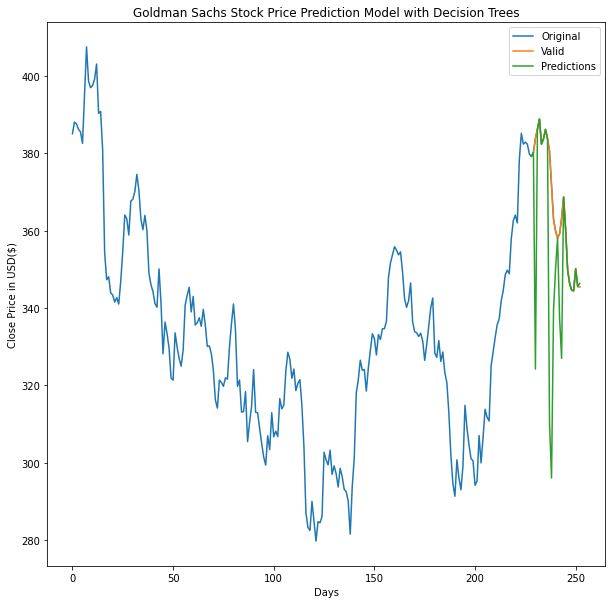

In [ ]:
predictions = DTPrediction
valid = df[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10,10))
plt.title("Goldman Sachs Stock Price Prediction Model with Decision Trees")
plt.xlabel("Days")
plt.ylabel("Close Price in USD($)")
plt.plot(df["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Original","Valid","Predictions"])
plt.show()

<ipython-input-102-dc0e49e7e504>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



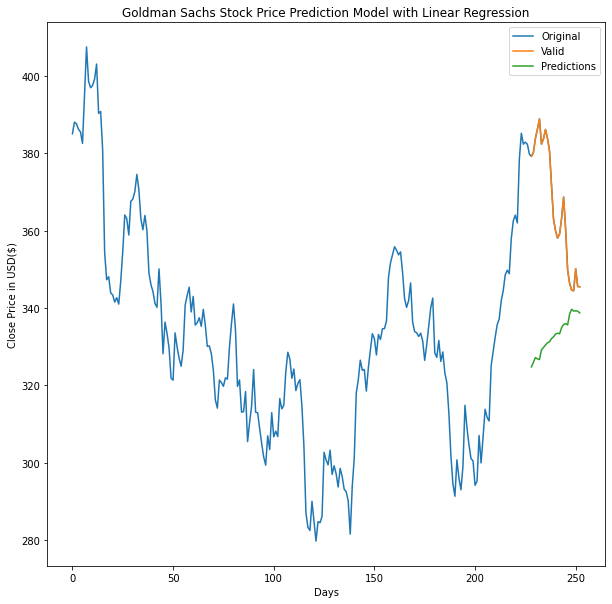

In [ ]:
predictions = LRPrediction
valid = df[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10,10))
plt.title("Goldman Sachs Stock Price Prediction Model with Linear Regression")
plt.xlabel("Days")
plt.ylabel("Close Price in USD($)")
plt.plot(df["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Original","Valid","Predictions"])
plt.show()

<ipython-input-119-2463ff66a579>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



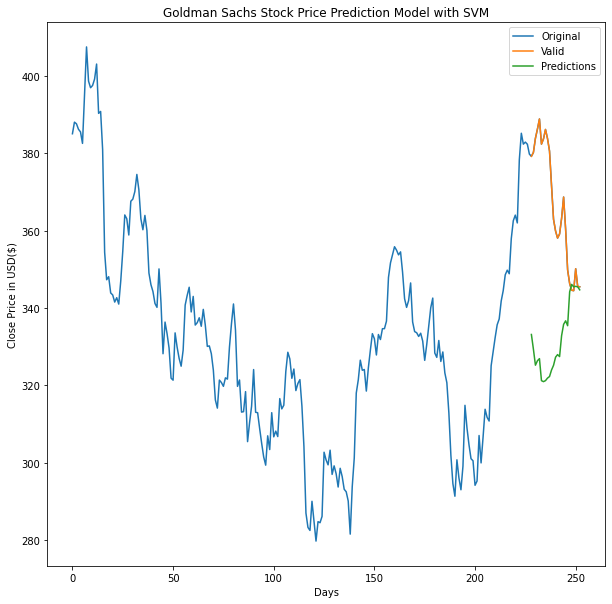

In [ ]:
predictions = SVMPrediction
valid = df[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10,10))
plt.title("Goldman Sachs Stock Price Prediction Model with SVM")
plt.xlabel("Days")
plt.ylabel("Close Price in USD($)")
plt.plot(df["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Original","Valid","Predictions"])
plt.show()

<ipython-input-129-30648221059b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



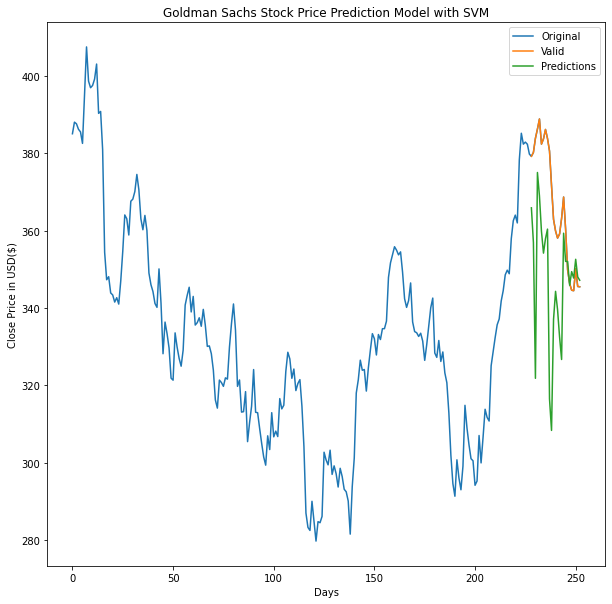

In [ ]:
predictions = RFpredict
valid = df[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10,10))
plt.title("Goldman Sachs Stock Price Prediction Model with SVM")
plt.xlabel("Days")
plt.ylabel("Close Price in USD($)")
plt.plot(df["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Original","Valid","Predictions"])
plt.show()

<ipython-input-135-f4f36b156132>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



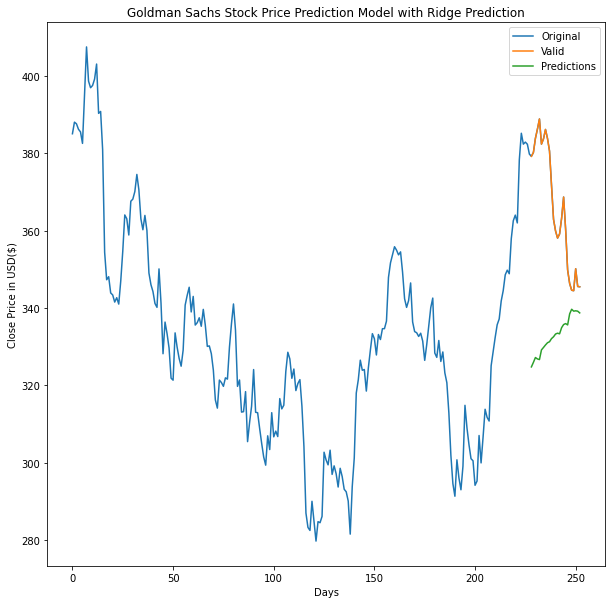

In [ ]:
predictions = RidgePredict
valid = df[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10,10))
plt.title("Goldman Sachs Stock Price Prediction Model with Ridge Prediction")
plt.xlabel("Days")
plt.ylabel("Close Price in USD($)")
plt.plot(df["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Original","Valid","Predictions"])
plt.show()